## Time_series_anaysis


In [2]:
import yfinance as yf

# Download stock data for a specific ticker (Apple in this case)
ticker = 'AAPL'
stock_data = yf.download(ticker, start="2010-01-01", end="2025-01-01")

# Show the first few rows of the data
print(stock_data.head())


YF.download() has changed argument auto_adjust default to True


[*********************100%***********************]  1 of 1 completed

Price          Close      High       Low      Open     Volume
Ticker          AAPL      AAPL      AAPL      AAPL       AAPL
Date                                                         
2010-01-04  6.440332  6.455078  6.391279  6.422878  493729600
2010-01-05  6.451468  6.487881  6.417461  6.458088  601904800
2010-01-06  6.348847  6.477046  6.342226  6.451466  552160000
2010-01-07  6.337109  6.379843  6.291066  6.372319  477131200
2010-01-08  6.379241  6.379843  6.291368  6.328684  447610800


#### visualize the data 

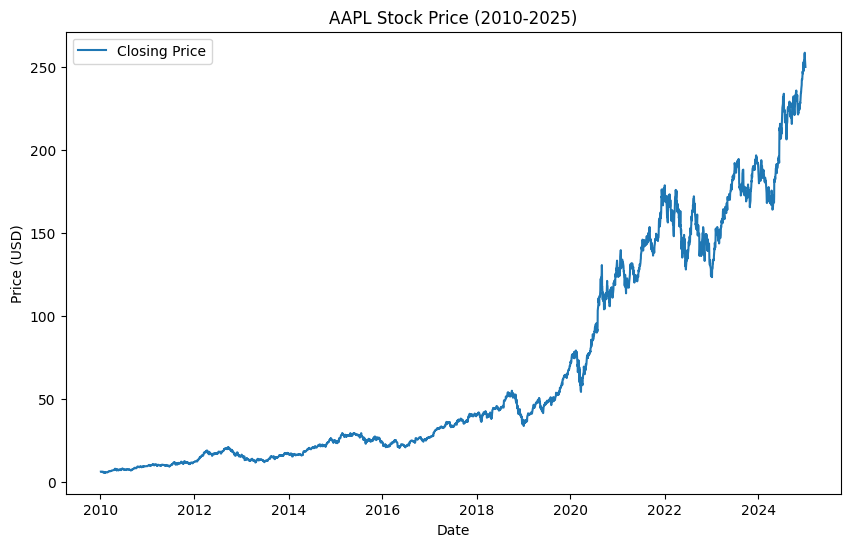

In [3]:
import matplotlib.pyplot as plt

# Visualize the Closing Price
plt.figure(figsize=(10, 6))
plt.plot(stock_data['Close'], label='Closing Price')
plt.title(f'{ticker} Stock Price (2010-2025)')
plt.xlabel('Date')
plt.ylabel('Price (USD)')
plt.legend()
plt.show()


#### Check for Stationarity

In [4]:
from statsmodels.tsa.stattools import adfuller

# ADF Test function to check stationarity
def adf_test(series):
    result = adfuller(series, autolag='AIC')
    print('ADF Statistic:', result[0])
    print('p-value:', result[1])
    if result[1] <= 0.05:
        print("Series is stationary")
    else:
        print("Series is not stationary")
        
# Apply ADF test on the Closing Price
adf_test(stock_data['Close'])


ADF Statistic: 1.7035850020214744
p-value: 0.9981373316578708
Series is not stationary


#### Make Data Stationary

In [5]:
# Differencing to make the data stationary
stock_data['Close_diff'] = stock_data['Close'].diff().dropna()

# Apply ADF test again on the differenced data
adf_test(stock_data['Close_diff'].dropna())


ADF Statistic: -14.23022361396493
p-value: 1.6013084225308737e-26
Series is stationary


#### Plot ACF and PACF to Find Optimal p and q

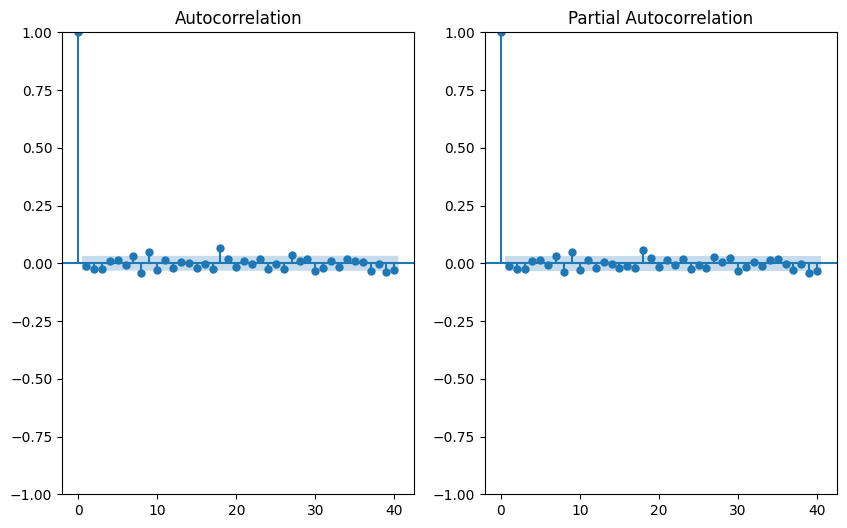

In [6]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

# Plot ACF and PACF for the differenced data
plt.figure(figsize=(10, 6))
plt.subplot(121)
plot_acf(stock_data['Close_diff'].dropna(), lags=40, ax=plt.gca())
plt.subplot(122)
plot_pacf(stock_data['Close_diff'].dropna(), lags=40, ax=plt.gca())
plt.show()


#### Make Predictions


In [8]:
from statsmodels.tsa.arima.model import ARIMA

# Fit ARIMA model with p=1, d=1, q=1
model = ARIMA(stock_data['Close'], order=(1, 1, 1))

# Fit the model
model_fit = model.fit()

# Print model summary to see coefficients
print(model_fit.summary())


                               SARIMAX Results                                
Dep. Variable:                   AAPL   No. Observations:                 3774
Model:                 ARIMA(1, 1, 1)   Log Likelihood               -7081.781
Date:                Mon, 10 Mar 2025   AIC                          14169.561
Time:                        13:36:30   BIC                          14188.268
Sample:                             0   HQIC                         14176.212
                               - 3774                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.5492      0.258      2.131      0.033       0.044       1.054
ma.L1         -0.5686      0.255     -2.232      0.026      -1.068      -0.069
sigma2         2.4994      0.023    106.661      0.0

/Users/akshaykharat/euron/.venv/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/Users/akshaykharat/euron/.venv/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/Users/akshaykharat/euron/.venv/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/Users/akshaykharat/euron/.venv/lib/python3.12/site-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros a

#### Make Predictions

/Users/akshaykharat/euron/.venv/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:837: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(


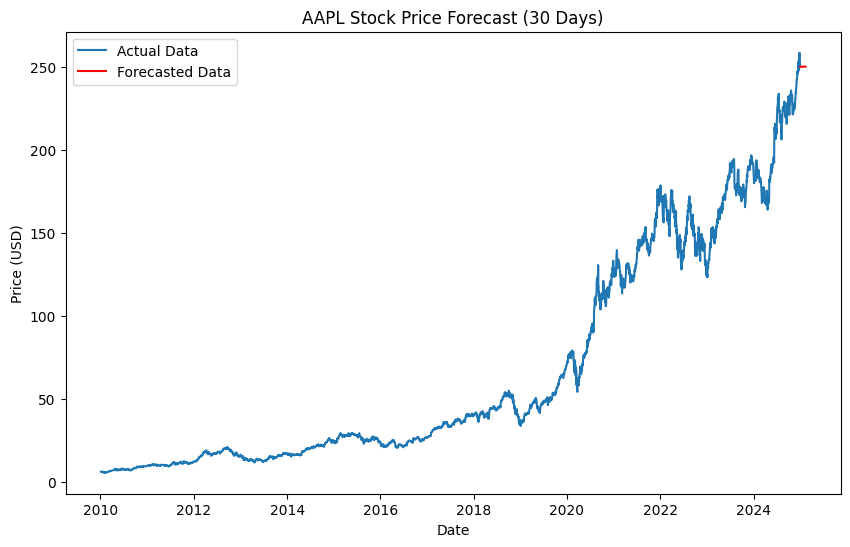

In [10]:
# import pandas frame
import pandas as pd
# Forecast the next 30 days
forecast = model_fit.forecast(steps=30)

# Create a date range for the forecasted period
forecast_index = pd.date_range(stock_data.index[-1], periods=30, freq='B')

# Plot the actual and forecasted values
plt.figure(figsize=(10, 6))
plt.plot(stock_data['Close'], label='Actual Data')
plt.plot(forecast_index, forecast, label='Forecasted Data', color='red')
plt.title(f'{ticker} Stock Price Forecast (30 Days)')
plt.xlabel('Date')
plt.ylabel('Price (USD)')
plt.legend()
plt.show()


#### Evaluate the Model

In [11]:
from sklearn.metrics import mean_squared_error
from math import sqrt

# Split the data: training data (all except the last 30 days) and test data (last 30 days)
train_data = stock_data['Close'][:-30]
test_data = stock_data['Close'][-30:]

# Make predictions for the test set (forecast next 30 days)
predicted = model_fit.forecast(steps=30)

# Calculate RMSE
rmse = sqrt(mean_squared_error(test_data, predicted))
print(f"Root Mean Squared Error (RMSE): {rmse}")


Root Mean Squared Error (RMSE): 11.50613140617582


/Users/akshaykharat/euron/.venv/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:837: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/Users/akshaykharat/euron/.venv/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:837: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(
